# Figure 2 - TF activities 

### Pre-requisites

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq
import anndata as ad

import matplotlib.pyplot as plt
from matplotlib import rcParams, rcdefaults


#sc.settings.set_figure_params(dpi=80, facecolor="white")

In [2]:
# Set the font globally
rcdefaults()

### Load data

In [3]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
file   = 'TF_activities_all_slides.h5ad'

adata = sc.read_h5ad(folder+file)
adata

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 368788 × 366
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial'

### Data Exploration

The anndata object is annotated with different levels of granularity:  
1. ``` 'cell_type_coarse' ``` obs field corresponds to the major pancreatic cell types identified only with the spatial gene panel.
2. ``` 'CellTypes_max' ``` obs field is the mapped annotation from npod dissociated data. The mapping task was performed using the optimal-transport-based tool [moscot](https://moscot.readthedocs.io/en/latest/notebooks/examples/problems/900_annotation_mapping.html).
3. ``` 'Niche_label' ``` obs field correspond to the niches identified using covet. 

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]


/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


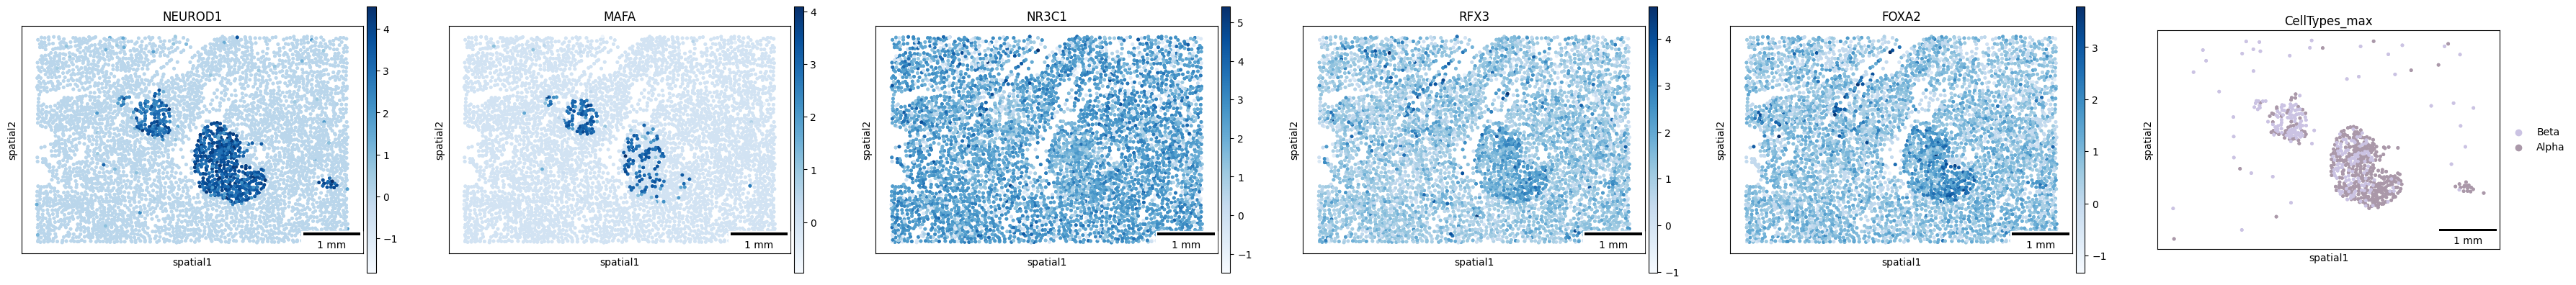

In [4]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['NEUROD1', 'MAFA','NR3C1','RFX3','FOXA2','CellTypes_max'],
    groups = ['Alpha','Beta','Delta'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    #vmax="p99",
)

In [5]:
!pip install decoupler

In [6]:
import decoupler as dc

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df_cond = dc.rank_sources_groups(adata, groupby='condition', reference='rest', method='t-test_overestim_var')
df_cond.head(10)

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,ND,rest,PAX6,48.140849,0.139551,0.000000e+00,0.000000e+00
1,ND,rest,YY2,47.588357,0.102350,0.000000e+00,0.000000e+00
2,ND,rest,GLI3,44.506107,0.105720,0.000000e+00,0.000000e+00
3,ND,rest,MAFA,42.017673,0.056929,0.000000e+00,0.000000e+00
4,ND,rest,INSM1,38.998420,0.076402,0.000000e+00,0.000000e+00
5,ND,rest,NEUROD1,33.763864,0.088261,2.028980e-249,3.992510e-249
6,ND,rest,RXRG,30.470933,0.040684,1.378715e-203,2.535726e-203
7,ND,rest,MNX1,26.278607,0.216291,4.965228e-152,8.572045e-152
8,ND,rest,ATF7,22.506973,0.106325,4.371531e-112,7.017458e-112
9,ND,rest,SCRT1,20.770708,0.022287,9.322070e-96,1.427564e-95


In [9]:
n_markers = 10
source_markers_cond = df_cond.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers_cond 

{'ND': ['PAX6',
  'YY2',
  'GLI3',
  'MAFA',
  'INSM1',
  'NEUROD1',
  'RXRG',
  'MNX1',
  'ATF7',
  'SCRT1'],
 'T1D': ['ZNF354C',
  'ZNF684',
  'ESRRA',
  'STAT3',
  'RBPJ',
  'HNF4A',
  'TCF3',
  'FOSL2',
  'THRB',
  'JUND']}

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


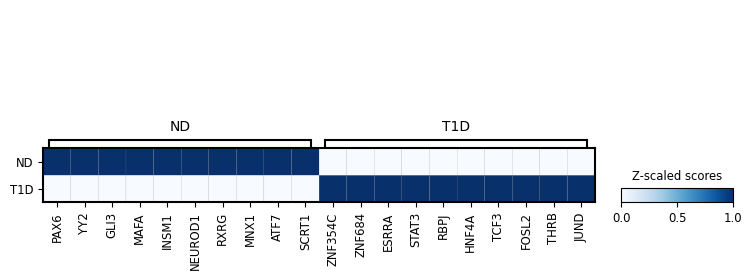

In [10]:
sc.pl.matrixplot(adata, source_markers_cond, 'condition', standard_scale='var',swap_axes=False,
                 colorbar_title='Z-scaled scores', cmap='Blues',save='top10_tfs_by_condition.pdf',)

In [12]:
df = dc.rank_sources_groups(adata, groupby='CellTypes_max', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Acinar_basal,rest,BHLHA15,375.130010,1.291169,0.0,0.0
1,Acinar_basal,rest,NR1D1,250.683710,2.524871,0.0,0.0
2,Acinar_basal,rest,GFI1,246.126242,1.760049,0.0,0.0
3,Acinar_basal,rest,CREB3,243.325415,2.905259,0.0,0.0
4,Acinar_basal,rest,NRL,239.884083,1.846687,0.0,0.0
...,...,...,...,...,...,...,...
4387,Tcells,rest,HNF4G,-203.602750,-2.079994,0.0,0.0
4388,Tcells,rest,MNT,-204.783100,-2.282951,0.0,0.0
4389,Tcells,rest,ZNF24,-207.292274,-2.487072,0.0,0.0
4390,Tcells,rest,TFAP4,-213.638814,-2.516818,0.0,0.0


In [14]:
n_markers = 2
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Acinar_basal': ['BHLHA15', 'NR1D1'],
 'Acinar_highEnz': ['GFI1', 'ZNF528'],
 'Acinar_sigdiff': ['ZBTB7B', 'NFIC'],
 'Acinar_signal': ['ETV7', 'POU5F1'],
 'Activated_Stellate': ['HAND2', 'OSR2'],
 'Alpha': ['NEUROD1', 'PAX3'],
 'Beta': ['RXRG', 'PAX6'],
 'Ductal': ['SOX8', 'ZNF667'],
 'Endothelial': ['HOXD8', 'MEOX2'],
 'Macrophage': ['RREB1', 'FOXC1'],
 'Quiescent_Stellate': ['TWIST1', 'TBX18'],
 'Tcells': ['TBX21', 'RUNX3']}

In [15]:
tf_markers = ['BHLHA15', 'NR1D1', 'GFI1', 'ZNF528', 'ETV7', 'POU5F1', 'ZBTB7B', 'NFIC', 'SOX8', 'ZNF667', 
              'RXRG', 'PAX6','NEUROD1', 'PAX3','HAND2', 'OSR2','TWIST1', 'TBX18','HOXD8', 'MEOX2',
              'RREB1', 'FOXC1','TBX21', 'RUNX3']

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


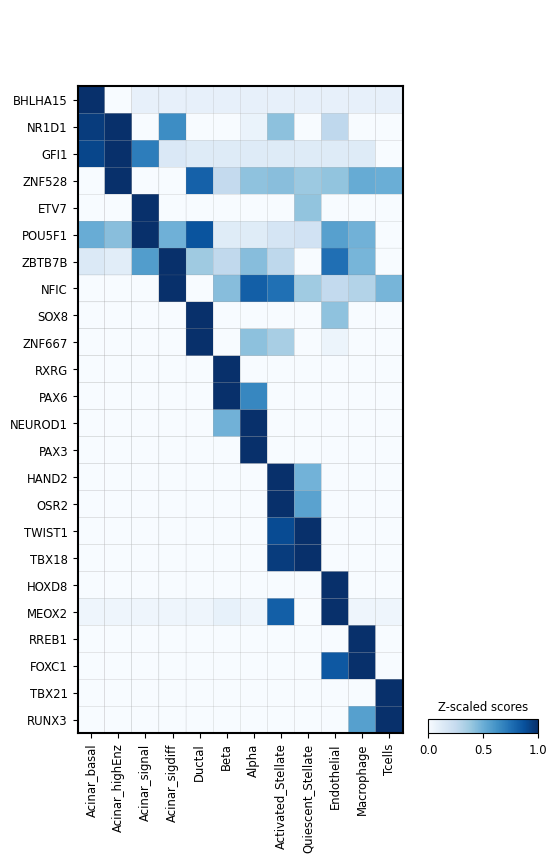

In [17]:
sc.pl.matrixplot(adata, tf_markers, 'CellTypes_max', standard_scale='var',swap_axes=True,
                 colorbar_title='Z-scaled scores', cmap='Blues',save='top2_tfs_by_celltype.pdf',)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


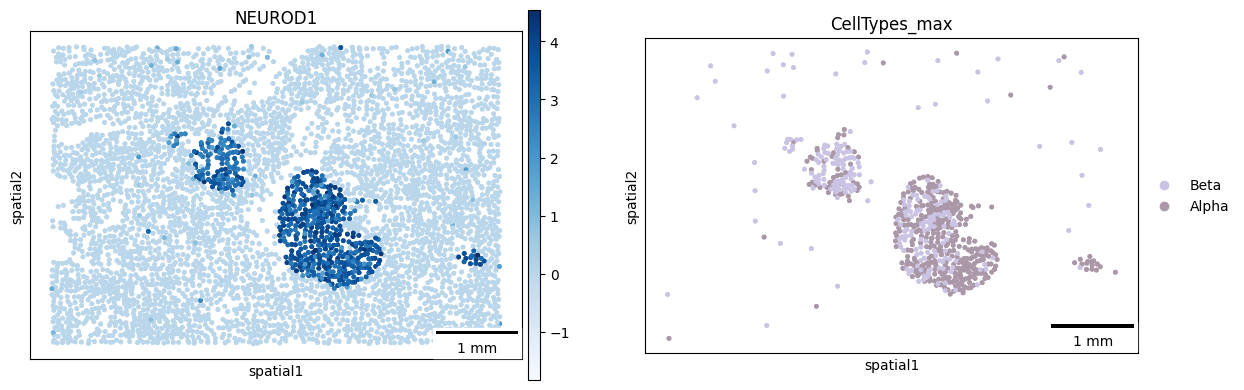

In [23]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['NEUROD1','CellTypes_max'],
    groups = ['Alpha','Beta'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='tfs_endo_spatial_scatter.pdf',
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


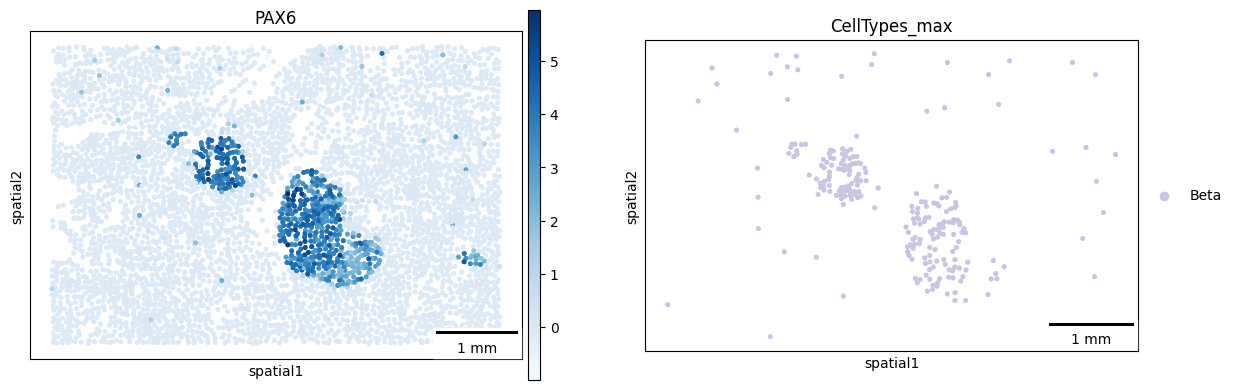

In [24]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['PAX6','CellTypes_max'],
    groups = ['Beta'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='tfs_beta_spatial_scatter.pdf',
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


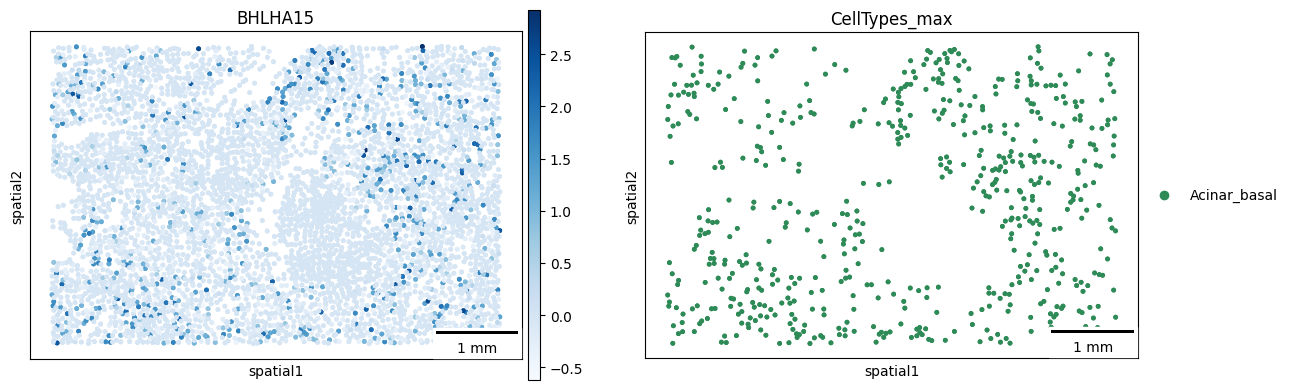

In [19]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['BHLHA15','CellTypes_max'],
    groups = ['Acinar_basal'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='tfs_acinar_spatial_scatter.pdf',
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


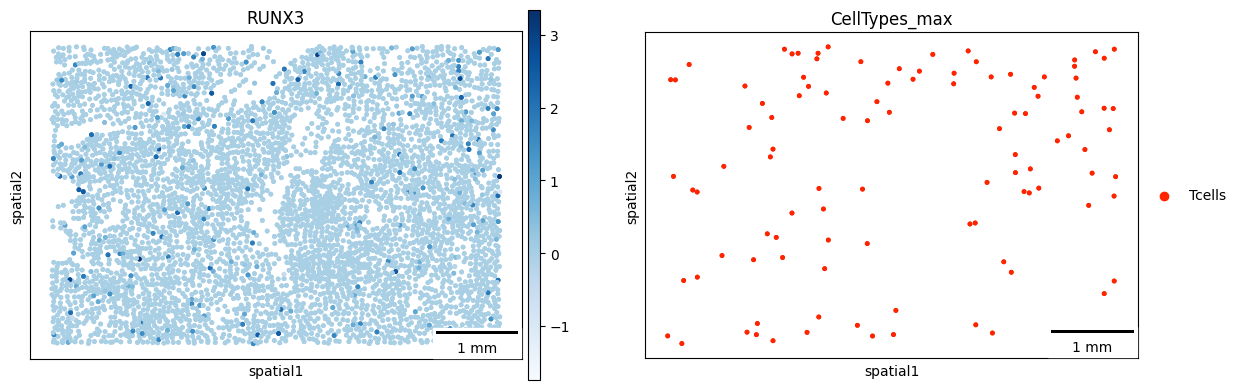

In [20]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['RUNX3','CellTypes_max'],
    groups = ['Tcells'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='tfs_tcells_spatial_scatter.pdf',
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


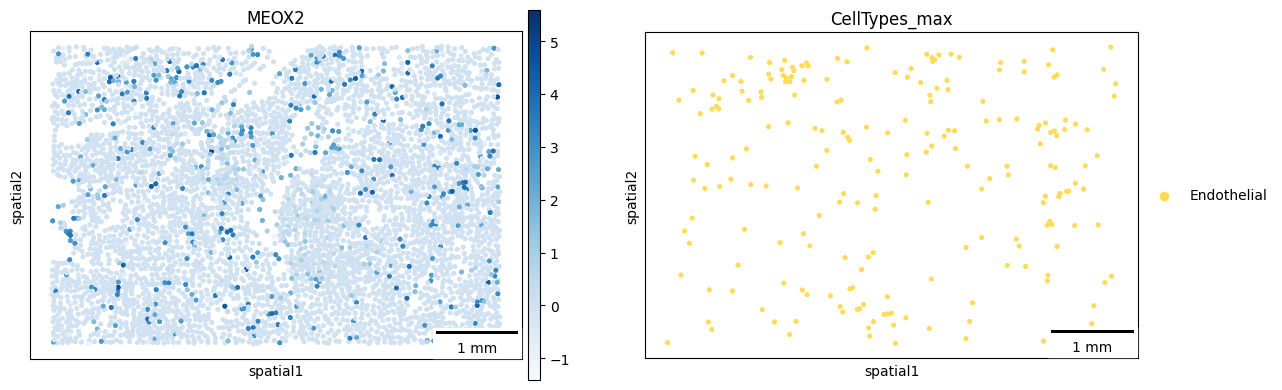

In [21]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['MEOX2','CellTypes_max'],
    groups = ['Endothelial'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='tfs_endothelial_spatial_scatter.pdf',
)